In [27]:
import re
import numpy as np
import random
import string
import scipy as sp
from sklearn.decomposition import TruncatedSVD
START_TOKEN = '<START>'
END_TOKEN = '<END>'

In [28]:
def read_corpus():
    with open('sentences.txt', encoding='utf-8') as f:
        text = f.read()
        # print("Original text:\n", text)
        text = text.translate(str.maketrans('', '', string.punctuation))
        text = ''.join([t for t in text if t not in list('0123456789')])
        # print("Text without punctuation and digits:\n", text)
    
    sentences = text.split('\n')
    print(sentences)
    corpus = [[START_TOKEN] + [re.sub(r'[^\w]', '', w.lower()) for w in sentence.split()] + [END_TOKEN] for sentence in sentences if sentence]
    
    return corpus

In [29]:
text = read_corpus()
text

['In recent years the field of data science has rapidly evolved driven by advancements in artificial intelligence AI and machine learning As industries increasingly rely on datadriven insights to make strategic decisions the demand for skilled professionals in this domain has surged Educational institutions are adapting their curricula to equip students with the knowledge and skills needed for these roles focusing on statistical analysis programming and AI technologies The job market is witnessing a growing number of opportunities in data science as companies across various sectors seek experts to harness big data and AI for competitive advantage This trend highlights the importance of staying current with technological advancements and continuously updating ones skill set to thrive in this dynamic field', '', '']


[['<START>',
  'in',
  'recent',
  'years',
  'the',
  'field',
  'of',
  'data',
  'science',
  'has',
  'rapidly',
  'evolved',
  'driven',
  'by',
  'advancements',
  'in',
  'artificial',
  'intelligence',
  'ai',
  'and',
  'machine',
  'learning',
  'as',
  'industries',
  'increasingly',
  'rely',
  'on',
  'datadriven',
  'insights',
  'to',
  'make',
  'strategic',
  'decisions',
  'the',
  'demand',
  'for',
  'skilled',
  'professionals',
  'in',
  'this',
  'domain',
  'has',
  'surged',
  'educational',
  'institutions',
  'are',
  'adapting',
  'their',
  'curricula',
  'to',
  'equip',
  'students',
  'with',
  'the',
  'knowledge',
  'and',
  'skills',
  'needed',
  'for',
  'these',
  'roles',
  'focusing',
  'on',
  'statistical',
  'analysis',
  'programming',
  'and',
  'ai',
  'technologies',
  'the',
  'job',
  'market',
  'is',
  'witnessing',
  'a',
  'growing',
  'number',
  'of',
  'opportunities',
  'in',
  'data',
  'science',
  'as',
  'companies',
  'acros

In [30]:
def distinct_words(corpus):
    
    corpus_words = []
    n_corpus_words = -1

    corpus_words = sorted(set(sum(corpus, [])))
    n_corpus_words = len(corpus_words)
    
    return corpus_words, n_corpus_words

In [31]:
vocab, vocab_size = distinct_words(text)

In [32]:
vocab

['<END>',
 '<START>',
 'a',
 'across',
 'adapting',
 'advancements',
 'advantage',
 'ai',
 'analysis',
 'and',
 'are',
 'artificial',
 'as',
 'big',
 'by',
 'companies',
 'competitive',
 'continuously',
 'current',
 'curricula',
 'data',
 'datadriven',
 'decisions',
 'demand',
 'domain',
 'driven',
 'dynamic',
 'educational',
 'equip',
 'evolved',
 'experts',
 'field',
 'focusing',
 'for',
 'growing',
 'harness',
 'has',
 'highlights',
 'importance',
 'in',
 'increasingly',
 'industries',
 'insights',
 'institutions',
 'intelligence',
 'is',
 'job',
 'knowledge',
 'learning',
 'machine',
 'make',
 'market',
 'needed',
 'number',
 'of',
 'on',
 'ones',
 'opportunities',
 'professionals',
 'programming',
 'rapidly',
 'recent',
 'rely',
 'roles',
 'science',
 'sectors',
 'seek',
 'set',
 'skill',
 'skilled',
 'skills',
 'statistical',
 'staying',
 'strategic',
 'students',
 'surged',
 'technological',
 'technologies',
 'the',
 'their',
 'these',
 'this',
 'thrive',
 'to',
 'trend',
 'upda

In [33]:
def compute_co_occurrence_matrix(corpus, window_size=4):
    words, n_words = distinct_words(corpus)
    M = None
    word2ind = {}
    
    word2ind = dict(zip(words, range(n_words)))
    M = np.zeros((n_words, n_words))

    for doc in corpus:
        for i, center in enumerate(doc):
            for j, out in enumerate(doc):
                if j != i and abs(j - i) <= window_size:
                    M[word2ind[center]][word2ind[out]] += 1

    return M, word2ind

In [34]:
co_occurence_matrix, word2ind = compute_co_occurrence_matrix(text) 

In [35]:
co_occurence_matrix

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [36]:
def reduce(M, k=2):

    n_iters = 10  
    M_reduced = None
    print("Running Truncated SVD over %i words..." % (M.shape[0]))
    
    M_reduced = TruncatedSVD(n_components=k, n_iter=n_iters).fit_transform(M)
    
    print("Done.")
    return M_reduced

In [37]:
matrix_reduced = reduce(co_occurence_matrix)
matrix_reduced

Running Truncated SVD over 90 words...
Done.


array([[ 0.6835969 , -0.64518158],
       [ 0.7677994 , -0.44884371],
       [ 0.6319682 , -0.59451665],
       [ 0.73742315, -0.5349823 ],
       [ 0.50216261, -0.17142614],
       [ 1.81906458,  0.16157348],
       [ 1.55562187,  0.51207646],
       [ 3.54468428,  1.66938213],
       [ 0.96982616,  1.34345127],
       [ 5.01700616,  2.88956974],
       [ 0.54961967, -0.42069955],
       [ 1.22344756,  0.21033085],
       [ 1.84254045,  0.20382738],
       [ 1.38980464,  0.55882511],
       [ 0.87233548, -0.79090156],
       [ 0.95809275, -0.74974246],
       [ 1.45985916,  0.34563143],
       [ 0.93314153,  0.59257228],
       [ 1.33386377,  0.17547577],
       [ 0.63274622,  0.1382304 ],
       [ 3.45061644, -1.59310645],
       [ 0.61266225,  0.72276899],
       [ 1.09805059,  0.33721002],
       [ 1.20991992, -0.07175471],
       [ 0.88546831, -0.94982495],
       [ 0.93543323, -1.05133632],
       [ 0.95323751, -0.63878505],
       [ 0.5485184 , -0.68845569],
       [ 0.96214584,

In [38]:
import matplotlib.pyplot as plt

def plot_embeddings(M_reduced, word2ind, words):
    
    for i, word in enumerate(words):
        [x, y] = M_reduced[word2ind[word], :]
        # plt.figure(figsize=(20,20))
        plt.scatter(x, y, color="red")
        plt.annotate(word, (x, y), xytext=(x, y+.05))
    
    plt.show()
    

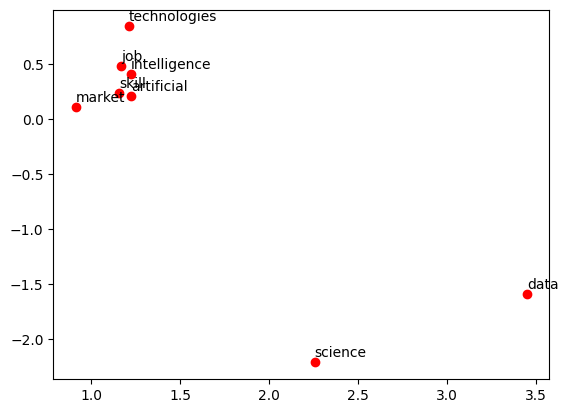

In [39]:
words =  ['data', 'science', 'market', 'job', 'artificial', 'intelligence', 'skill', 'technologies']
plot_embeddings(matrix_reduced, word2ind, words)